In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

C:\Users\HP\AppData\Local\Temp\ipykernel_11056\2945004344.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [3]:
df = pd.read_csv('D:/github-programs/deep_learning/ANN/datsets/ushape.csv')
new_column_names = {
    '3.159499363321345566e-02': 'X',
    '9.869877579082642072e-01': 'Y',
    '0.000000000000000000e+00': 'Class'
}

df = df.rename(columns=new_column_names)

In [32]:
df.head()

,X,Y,Class
0,2.115098,-0.046244,1.0
1,0.882490,-0.075756,0.0
2,-0.055144,-0.037332,1.0
3,0.829545,-0.539321,1.0
4,2.112857,0.662084,1.0


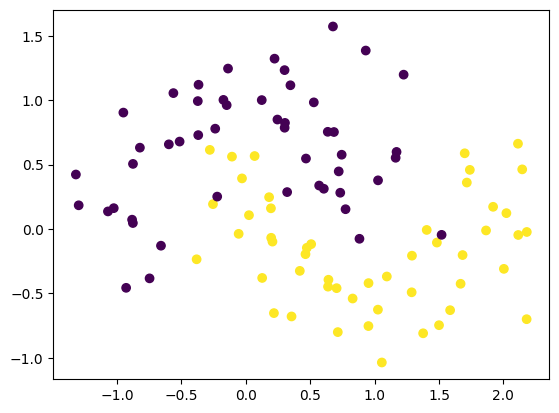

In [33]:
import matplotlib.pyplot as plt
plt.scatter(df['X'],df['Y'],c=df['Class'])

## **Case-1** - Zero Intialization

In [6]:
X = df.iloc[:,0:2].values
Y = df.iloc[:,-1].values
X.shape,Y.shape

((99, 2), (99,))

In [7]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

### Using relu

In [8]:
model1 = Sequential()
model1.add(Dense(10,activation='relu',input_dim=2))
model1.add(Dense(1,activation='relu'))

In [9]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                30        
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 41 (164.00 Byte)
Trainable params: 41 (164.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
# Set parameter to zero
model1.get_weights()

[array([[-0.48399788, -0.1637373 ,  0.44285256, -0.41056222, -0.40423512,
         -0.58018357, -0.6391573 , -0.10964066, -0.59550965, -0.23056534],
        [ 0.33023638, -0.08947068,  0.26168925, -0.39896443,  0.45907277,
          0.65277594, -0.6194904 , -0.10470527,  0.31999034,  0.46227795]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.13773942],
        [ 0.4837069 ],
        [-0.5828342 ],
        [ 0.6414084 ],
        [-0.55877036],
        [-0.44084126],
        [-0.29114714],
        [ 0.24717462],
        [ 0.620729  ],
        [-0.07732594]], dtype=float32),
 array([0.], dtype=float32)]

In [11]:
initial_weights = model1.get_weights()

In [12]:
initial_weights[0] = np.zeros(model1.get_weights()[0].shape)
initial_weights[1] = np.zeros(model1.get_weights()[1].shape)
initial_weights[2] = np.zeros(model1.get_weights()[2].shape)
initial_weights[3] = np.zeros(model1.get_weights()[3].shape)

In [13]:
model1.set_weights(initial_weights)

In [14]:
model1.get_weights()

[array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]], dtype=float32),
 array([0.], dtype=float32)]

In [15]:
model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [16]:
history = model1.fit(X,Y,epochs=100,validation_split=0.2)

Epoch 1/100


3/3 [==============================] - 1s 95ms/step - loss: 7.8101 - accuracy: 0.4937 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 2/100
3/3 [==============================] - 0s 17ms/step - loss: 7.8101 - accuracy: 0.4937 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 3/100
3/3 [==============================] - 0s 14ms/step - loss: 7.8101 - accuracy: 0.4937 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 4/100
3/3 [==============================] - 0s 20ms/step - loss: 7.8101 - accuracy: 0.4937 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 5/100
3/3 [==============================] - 0s 20ms/step - loss: 7.8101 - accuracy: 0.4937 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 6/100
3/3 [==============================] - 0s 17ms/step - loss: 7.8101 - accuracy: 0.4937 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 7/100
3/3 [==============================] - 0s 9ms/step - loss: 7.8101 - accuracy: 0.4937 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 8/100
3/3 [==

In [17]:
model1.get_weights()

[array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]], dtype=float32),
 array([0.], dtype=float32)]

9600/9600 [==============================] - 8s 828us/step


<Axes: >

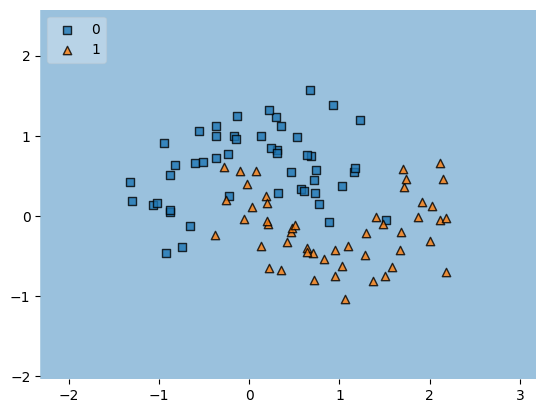

In [18]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,Y.astype('int'), clf=model1, legend=2)

### using sigmoid

In [19]:
model1_sigmoid = Sequential()
model1_sigmoid.add(Dense(10,activation='sigmoid',input_dim=2))
model1_sigmoid.add(Dense(1,activation='sigmoid'))
model1_sigmoid.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 10)                30        
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 41 (164.00 Byte)
Trainable params: 41 (164.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
# set weights to zero
model1_sigmoid.get_weights()

[array([[-0.55082154, -0.62884647, -0.11400807,  0.6938681 , -0.44498676,
          0.3528003 , -0.06105661, -0.1196357 , -0.3506901 ,  0.41809338],
        [-0.01489639, -0.15725797,  0.40086335,  0.00610554,  0.32011777,
          0.6650837 , -0.409974  , -0.09027368, -0.16270775, -0.15127718]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.10388184],
        [ 0.13292265],
        [ 0.14071172],
        [-0.05012912],
        [-0.47073147],
        [ 0.72522277],
        [ 0.16827834],
        [-0.00422215],
        [-0.2195279 ],
        [ 0.6866664 ]], dtype=float32),
 array([0.], dtype=float32)]

In [21]:
initial_weights = model1_sigmoid.get_weights()

initial_weights[0] = np.zeros(model1_sigmoid.get_weights()[0].shape)
initial_weights[1] = np.zeros(model1_sigmoid.get_weights()[1].shape)
initial_weights[2] = np.zeros(model1_sigmoid.get_weights()[2].shape)
initial_weights[3] = np.zeros(model1_sigmoid.get_weights()[3].shape)

In [22]:
model1_sigmoid.set_weights(initial_weights)
model1_sigmoid.get_weights()

[array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]], dtype=float32),
 array([0.], dtype=float32)]

In [23]:
model1_sigmoid.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model1_sigmoid.fit(X,Y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 [==============================] - 1s 108ms/step - loss: 0.6934 - accuracy: 0.4937 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/100
3/3 [==============================] - 0s 30ms/step - loss: 0.6932 - accuracy: 0.4937 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/100
3/3 [==============================] - 0s 24ms/step - loss: 0.6932 - accuracy: 0.4557 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/100
3/3 [==============================] - 0s 21ms/step - loss: 0.6932 - accuracy: 0.5063 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/100
3/3 [==============================] - 0s 19ms/step - loss: 0.6932 - accuracy: 0.5063 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 6/100
3/3 [==============================] - 0s 15ms/step - loss: 0.6931 - accuracy: 0.5063 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 7/100
3/3 [==============================] - 0s 22ms/step - loss: 0.6931 - accuracy: 0.5063 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 8/100
3/3 [==

In [24]:
model1_sigmoid.get_weights()

[array([[ 0.40006557,  0.40006557,  0.40006557,  0.40006557,  0.40006557,
          0.40006557,  0.40006557,  0.40006557,  0.40006557,  0.40006557],
        [-0.44152075, -0.44152075, -0.44152075, -0.44152075, -0.44152075,
         -0.44152075, -0.44152075, -0.44152075, -0.44152075, -0.44152075]],
       dtype=float32),
 array([-0.10714153, -0.10714153, -0.10714153, -0.10714153, -0.10714153,
        -0.10714153, -0.10714153, -0.10714153, -0.10714153, -0.10714153],
       dtype=float32),
 array([[0.05086333],
        [0.05086333],
        [0.05086333],
        [0.05086333],
        [0.05086333],
        [0.05086333],
        [0.05086333],
        [0.05086333],
        [0.05086333],
        [0.05086333]], dtype=float32),
 array([-0.04349501], dtype=float32)]

9600/9600 [==============================] - 9s 910us/step


<Axes: >

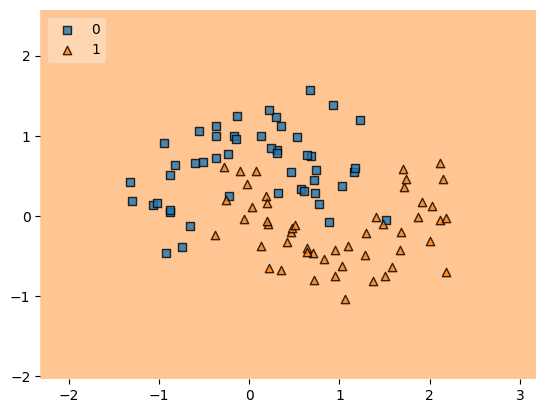

In [25]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,Y.astype('int'), clf=model1_sigmoid, legend=2)

## **Case 2-**Non Zero Constant value
### Use of sigmoid

In [26]:
model2 = Sequential()
model2.add(Dense(10,activation='sigmoid',input_dim=2))
model2.add(Dense(1,activation='sigmoid'))

model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 10)                30        
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 41 (164.00 Byte)
Trainable params: 41 (164.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [27]:
model2.get_weights()

[array([[-0.21988836, -0.07401174,  0.11974883,  0.65998274, -0.15414333,
          0.5301333 ,  0.05026734, -0.04942393,  0.6254385 , -0.1745817 ],
        [ 0.48196083, -0.33620575, -0.43107426,  0.09843159,  0.4455164 ,
          0.6542478 ,  0.6558204 , -0.6484864 ,  0.53848916, -0.4417642 ]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.70613104],
        [-0.17422223],
        [ 0.11888051],
        [ 0.11352772],
        [ 0.6018935 ],
        [-0.6744323 ],
        [-0.16427052],
        [ 0.4552564 ],
        [ 0.21856874],
        [ 0.35607642]], dtype=float32),
 array([0.], dtype=float32)]

In [28]:
initial_weights = model2.get_weights()

initial_weights[0] = np.ones(model2.get_weights()[0].shape)*0.5
initial_weights[1] = np.ones(model2.get_weights()[1].shape)*0.5
initial_weights[2] = np.ones(model2.get_weights()[2].shape)*0.5
initial_weights[3] = np.ones(model2.get_weights()[3].shape)*0.5

model2.set_weights(initial_weights)
model2.get_weights()

[array([[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
        [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]], dtype=float32),
 array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5], dtype=float32),
 array([[0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5]], dtype=float32),
 array([0.5], dtype=float32)]

In [29]:
model2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model2.fit(X,Y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 [==============================] - 1s 67ms/step - loss: 1.9925 - accuracy: 0.5063 - val_loss: 1.8420 - val_accuracy: 0.5000
Epoch 2/100
3/3 [==============================] - 0s 17ms/step - loss: 1.9793 - accuracy: 0.5063 - val_loss: 1.8295 - val_accuracy: 0.5000
Epoch 3/100
3/3 [==============================] - 0s 17ms/step - loss: 1.9657 - accuracy: 0.5063 - val_loss: 1.8172 - val_accuracy: 0.5000
Epoch 4/100
3/3 [==============================] - 0s 16ms/step - loss: 1.9517 - accuracy: 0.5063 - val_loss: 1.8051 - val_accuracy: 0.5000
Epoch 5/100
3/3 [==============================] - 0s 17ms/step - loss: 1.9396 - accuracy: 0.5063 - val_loss: 1.7928 - val_accuracy: 0.5000
Epoch 6/100
3/3 [==============================] - 0s 14ms/step - loss: 1.9259 - accuracy: 0.5063 - val_loss: 1.7806 - val_accuracy: 0.5000
Epoch 7/100
3/3 [==============================] - 0s 17ms/step - loss: 1.9118 - accuracy: 0.5063 - val_loss: 1.7685 - val_accuracy: 0.5000
Epoch 8/100
3/3 [===

In [30]:
model2.get_weights()

[array([[0.44978768, 0.44978768, 0.44978768, 0.44978768, 0.44978768,
         0.44978768, 0.44978768, 0.44978768, 0.44978768, 0.44978768],
        [0.24309753, 0.24309753, 0.24309753, 0.24309753, 0.24309753,
         0.24309753, 0.24309753, 0.24309753, 0.24309753, 0.24309753]],
       dtype=float32),
 array([0.25661457, 0.25661457, 0.25661457, 0.25661457, 0.25661457,
        0.25661457, 0.25661457, 0.25661457, 0.25661457, 0.25661457],
       dtype=float32),
 array([[0.23017234],
        [0.23017234],
        [0.23017234],
        [0.23017234],
        [0.23017234],
        [0.23017234],
        [0.23017234],
        [0.23017234],
        [0.23017234],
        [0.23017234]], dtype=float32),
 array([0.2220383], dtype=float32)]

9600/9600 [==============================] - 8s 851us/step


<Axes: >

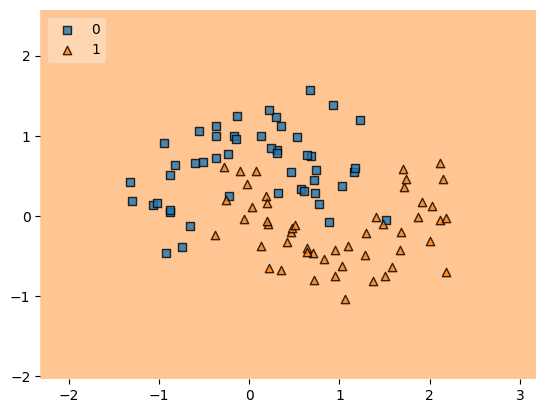

In [31]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,Y.astype('int'), clf=model2, legend=2)

## **Case 3 -**Random Intialization with samll weights
## **Case 4 -**Random Intialization with large weights

# Solution
### **1. Xavier / Glorot Intialization**(tanh)
#### **- glorot_normal**

#### **- glorot_uniform**
### **2. He Intialization**(Relu)
#### **- he_normal**

#### **- he_uniform**

In [34]:
model_glorat = Sequential()
model_glorat.add(Dense(10,activation='tanh',input_dim=2,kernel_initializer='glorot_normal'))
model_glorat.add(Dense(10,activation='tanh',kernel_initializer='glorot_normal'))
model_glorat.add(Dense(10,activation='tanh',kernel_initializer='glorot_normal'))
model_glorat.add(Dense(10,activation='tanh',kernel_initializer='glorot_normal'))
model_glorat.add(Dense(1,activation='sigmoid'))

model_glorat.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                30        
                                                                 
 dense_7 (Dense)             (None, 10)                110       
                                                                 
 dense_8 (Dense)             (None, 10)                110       
                                                                 
 dense_9 (Dense)             (None, 10)                110       
                                                                 
 dense_10 (Dense)            (None, 1)                 11        
                                                                 
Total params: 371 (1.45 KB)
Trainable params: 371 (1.45 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [35]:
model_glorat.get_weights()

[array([[ 0.06127045, -0.26254654,  0.26771477, -0.02668449, -0.13459353,
          0.10173845,  0.23879054,  0.33174312, -0.33697486,  0.2733742 ],
        [-0.85302824, -0.8788535 , -0.8326158 ,  0.06087395, -0.33548775,
          0.12142789,  0.0191398 ,  0.10572027, -0.7220024 , -0.4170777 ]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.13492228, -0.5993181 ,  0.48107356,  0.57974833, -0.43748763,
          0.01365841,  0.01438682, -0.29633725, -0.38857841, -0.24770944],
        [ 0.51171845,  0.29741997, -0.2190338 , -0.43073806,  0.28096384,
         -0.4656884 ,  0.01260402, -0.311324  ,  0.61558366, -0.12667671],
        [ 0.26261833,  0.36757484, -0.32174832, -0.02636643, -0.1067285 ,
         -0.46404365,  0.15795746,  0.19462323, -0.6222965 ,  0.47089863],
        [ 0.04863173,  0.2824122 , -0.0196493 , -0.3334852 ,  0.2524056 ,
         -0.2163373 ,  0.15405962, -0.14485261,  0.7137987 ,  0.6015115 ],
        [-0.01089

In [36]:
initial_weights = model_glorat.get_weights()

initial_weights[0] = np.random.randn(2,10)*np.sqrt(1/2)
initial_weights[1] = np.zeros(model_glorat.get_weights()[1].shape)
initial_weights[2] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[3] = np.zeros(model_glorat.get_weights()[3].shape)
initial_weights[4] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[5] = np.zeros(model_glorat.get_weights()[5].shape)
initial_weights[6] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[7] = np.zeros(model_glorat.get_weights()[7].shape)
initial_weights[8] = np.random.randn(10,1)*np.sqrt(1/10)
initial_weights[9] = np.zeros(model_glorat.get_weights()[9].shape)

model_glorat.set_weights(initial_weights)
model_glorat.get_weights()

[array([[ 0.3394104 , -0.00655034,  0.16486461,  0.55228364, -0.49488422,
         -0.7018908 ,  0.3304006 , -0.38866165,  2.0635684 , -0.23071076],
        [ 0.3891108 , -0.46069503, -0.66880363, -0.2988086 ,  0.35659838,
         -0.5938172 ,  0.03263511,  0.24154331, -0.24670814,  0.14707069]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.01073548, -0.3692909 , -0.51020336, -0.00128444,  0.7158959 ,
         -0.6005981 ,  0.26256728,  0.11237574,  0.4011841 , -0.36826023],
        [ 0.2296051 ,  0.10303141,  0.519179  ,  0.3362282 , -0.07174261,
         -0.28797665, -0.22237873,  0.12275482,  0.28271547, -0.04177165],
        [-0.01618838, -0.0064142 ,  0.57137793, -0.08774028, -0.3210726 ,
          0.06520961, -0.40294003,  0.15172009, -0.40191945, -0.29357833],
        [ 0.1050294 ,  0.4716851 ,  0.22991557,  0.12772216,  0.27015182,
          0.31364393,  0.16277073,  0.5844161 , -0.0904061 ,  0.3309597 ],
        [ 0.29579

In [37]:
model_glorat.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

history = model_glorat.fit(X,Y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 [==============================] - 1s 80ms/step - loss: 0.7418 - accuracy: 0.1772 - val_loss: 0.7419 - val_accuracy: 0.1500
Epoch 2/100
3/3 [==============================] - 0s 14ms/step - loss: 0.7285 - accuracy: 0.2152 - val_loss: 0.7248 - val_accuracy: 0.1500
Epoch 3/100
3/3 [==============================] - 0s 29ms/step - loss: 0.7164 - accuracy: 0.2785 - val_loss: 0.7089 - val_accuracy: 0.4000
Epoch 4/100
3/3 [==============================] - 0s 15ms/step - loss: 0.7048 - accuracy: 0.3671 - val_loss: 0.6937 - val_accuracy: 0.6000
Epoch 5/100
3/3 [==============================] - 0s 18ms/step - loss: 0.6939 - accuracy: 0.5316 - val_loss: 0.6789 - val_accuracy: 0.6500
Epoch 6/100
3/3 [==============================] - 0s 26ms/step - loss: 0.6831 - accuracy: 0.5696 - val_loss: 0.6649 - val_accuracy: 0.8000
Epoch 7/100
3/3 [==============================] - 0s 14ms/step - loss: 0.6725 - accuracy: 0.6709 - val_loss: 0.6504 - val_accuracy: 0.8500
Epoch 8/100
3/3 [===

In [38]:
model_glorat.get_weights()

[array([[ 0.34820443,  0.02227975,  0.22476323,  0.4800802 , -0.4599229 ,
         -0.78737694,  0.23169331, -0.38778585,  2.003714  , -0.2108976 ],
        [ 0.36512643, -0.49991396, -0.6905098 , -0.45788404,  0.50507665,
         -0.66234076,  0.06453339,  0.31203306, -0.28912845,  0.15747564]],
       dtype=float32),
 array([ 0.05877607, -0.04151846, -0.0572047 , -0.05358785,  0.05399621,
         0.15497099,  0.01898837, -0.11983697,  0.14516449,  0.09405191],
       dtype=float32),
 array([[-0.01169169, -0.3917395 , -0.5665849 , -0.04304913,  0.5912564 ,
         -0.5408297 ,  0.2491143 ,  0.07771714,  0.40579206, -0.3843882 ],
        [ 0.33164892,  0.07799672,  0.46516666,  0.38043663,  0.03720828,
         -0.3956633 , -0.3237925 ,  0.21026859,  0.15670356,  0.0601222 ],
        [ 0.09418453, -0.04016671,  0.5087178 , -0.03673025, -0.2248182 ,
         -0.04718415, -0.5272079 ,  0.24645244, -0.53348285, -0.16845   ],
        [ 0.19836304,  0.39571145,  0.16490729,  0.09217997, 

9600/9600 [==============================] - 8s 831us/step


<Axes: >

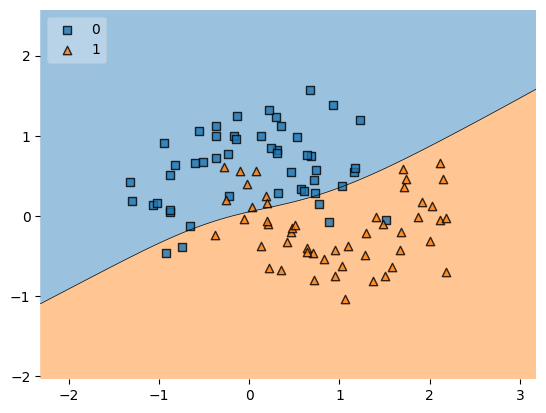

In [39]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,Y.astype('int'), clf=model_glorat, legend=2)

**He intializer**

In [40]:
model_he = Sequential()

model_he.add(Dense(10,activation='relu',input_dim=2,kernel_initializer='he_normal'))
model_he.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model_he.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model_he.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model_he.add(Dense(1,activation='sigmoid'))

model_he.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 10)                30        
                                                                 
 dense_12 (Dense)            (None, 10)                110       
                                                                 
 dense_13 (Dense)            (None, 10)                110       
                                                                 
 dense_14 (Dense)            (None, 10)                110       
                                                                 
 dense_15 (Dense)            (None, 1)                 11        
                                                                 
Total params: 371 (1.45 KB)
Trainable params: 371 (1.45 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [41]:
initial_weights = model_he.get_weights()

initial_weights[0] = np.random.randn(2,10)*np.sqrt(1/2)
initial_weights[1] = np.zeros(model_he.get_weights()[1].shape)
initial_weights[2] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[3] = np.zeros(model_he.get_weights()[3].shape)
initial_weights[4] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[5] = np.zeros(model_he.get_weights()[5].shape)
initial_weights[6] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[7] = np.zeros(model_he.get_weights()[7].shape)
initial_weights[8] = np.random.randn(10,1)*np.sqrt(1/10)
initial_weights[9] = np.zeros(model_he.get_weights()[9].shape)

model_he.set_weights(initial_weights)
model_he.get_weights()

[array([[ 1.0393392 ,  0.9495514 , -0.91820204,  1.3006386 ,  0.27056012,
         -0.2793475 , -0.20111161,  0.10843254,  1.8441976 , -1.3196073 ],
        [ 0.53677726, -1.0680372 ,  0.33779836,  0.3270827 ,  0.10991976,
          1.0457401 , -0.23892081, -0.6613392 ,  0.53833234, -0.3046764 ]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.23773208,  0.18343696,  0.3153947 , -0.48717904, -0.13315006,
         -0.09625436, -0.5338357 ,  0.22552183,  0.24006186,  0.52540725],
        [-0.15147308, -0.08960867, -0.4591545 , -0.0687694 ,  0.31844503,
         -0.34442353,  0.00185168,  0.08268613, -0.4107046 , -0.31503826],
        [ 0.3586756 ,  0.19544989, -0.08798844, -0.07927001,  0.34658566,
         -0.04578853, -0.04943136, -0.21366383,  0.4003151 ,  0.42393562],
        [-0.25581047,  0.0085036 , -0.02009892, -0.24550241, -0.00515485,
         -0.00353212, -0.25741062,  0.09378333,  0.24372497, -0.00969155],
        [-0.09737

In [42]:
model_he.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

history = model_he.fit(X,Y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 [==============================] - 1s 75ms/step - loss: 0.7073 - accuracy: 0.5570 - val_loss: 0.7369 - val_accuracy: 0.4000
Epoch 2/100
3/3 [==============================] - 0s 16ms/step - loss: 0.7017 - accuracy: 0.6076 - val_loss: 0.7276 - val_accuracy: 0.4500
Epoch 3/100
3/3 [==============================] - 0s 16ms/step - loss: 0.6969 - accuracy: 0.6076 - val_loss: 0.7185 - val_accuracy: 0.5500
Epoch 4/100
3/3 [==============================] - 0s 21ms/step - loss: 0.6922 - accuracy: 0.6076 - val_loss: 0.7105 - val_accuracy: 0.6000
Epoch 5/100
3/3 [==============================] - 0s 13ms/step - loss: 0.6877 - accuracy: 0.6076 - val_loss: 0.7032 - val_accuracy: 0.6000
Epoch 6/100
3/3 [==============================] - 0s 16ms/step - loss: 0.6827 - accuracy: 0.6709 - val_loss: 0.6966 - val_accuracy: 0.6000
Epoch 7/100
3/3 [==============================] - 0s 18ms/step - loss: 0.6784 - accuracy: 0.6709 - val_loss: 0.6906 - val_accuracy: 0.6000
Epoch 8/100
3/3 [===

In [43]:
model_he.get_weights()

[array([[ 0.9827685 ,  1.1155825 , -0.9695961 ,  1.3467648 ,  0.17095125,
         -0.32185397, -0.42003506,  0.29833728,  2.077827  , -1.4412124 ],
        [ 0.7257505 , -1.319256  ,  0.31279343,  0.2013254 ,  0.04509787,
          1.2417146 , -0.13234828, -0.8812382 ,  0.4255133 , -0.32843983]],
       dtype=float32),
 array([ 0.04854615,  0.08134581, -0.16054621, -0.06215035, -0.13387862,
         0.14243671, -0.03278809,  0.17816702,  0.2269936 , -0.05112989],
       dtype=float32),
 array([[ 0.3305229 ,  0.12066109,  0.26222366, -0.46395656, -0.070554  ,
         -0.09625436, -0.56398004,  0.29429448,  0.31853956,  0.5303769 ],
        [-0.27049065,  0.16934334, -0.4591545 ,  0.03779316,  0.52513266,
         -0.36246997, -0.0758081 , -0.03063716, -0.5861305 , -0.33029523],
        [ 0.44879532,  0.3463852 , -0.18606769, -0.16915378,  0.26777688,
         -0.01832146,  0.03829281,  0.02659265,  0.48218876,  0.3501093 ],
        [-0.20916662, -0.07367005, -0.04724975, -0.15422507, 

9600/9600 [==============================] - 9s 955us/step


<Axes: >

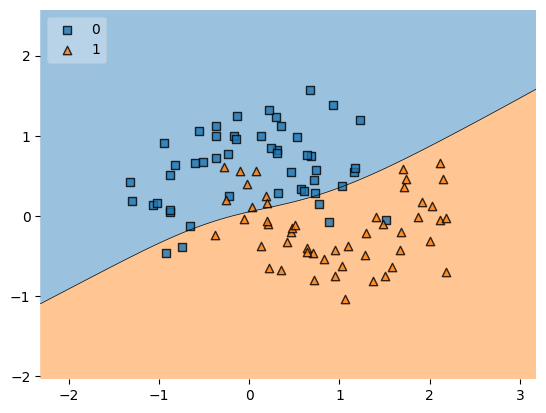

In [44]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,Y.astype('int'), clf=model_glorat, legend=2)